In [68]:
##An object-oriented perceptron API
import numpy as np
from sklearn.svm import SVC
import sklearn.metrics





In [1]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print("Errors: ", errors) #LS
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    def score(self, X, y):
        y = self.predict(X)
        return sklearn.metrics.mean_squared_error(X, y)
    

In [2]:
import os
import pandas as pd

dataset = pd.read_csv("C:/Users/teddy/Downloads/Machine Learning/Perceptron HW/BankNote_Authentication.csv")

dataset.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
X = dataset.drop('class',axis =1)
Y = dataset['class']
Y.head()



0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

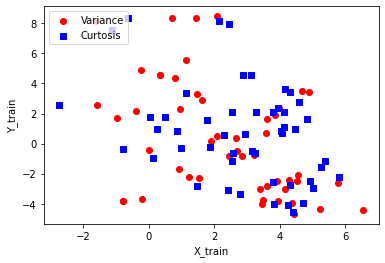

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = dataset.iloc[500:5000, 4].values


# extract Variance and Curtosis
X = dataset.iloc[0:5000, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Variance')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Curtosis')

plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)



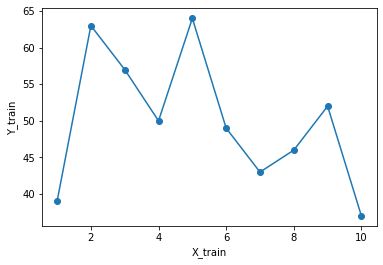

In [5]:
from sklearn.svm import SVC
import time
time.time()
ppn = Perceptron(eta=0.001, n_iter=10)

ppn.fit(X, y)


plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('X_train')
plt.ylabel('Y_train')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

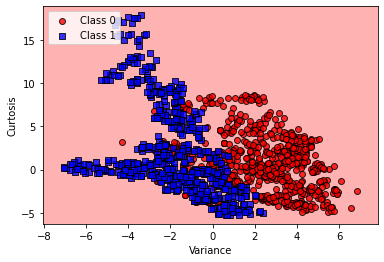

In [7]:
plot_decision_regions(X, Y, classifier=ppn)
plt.xlabel('Variance')
plt.ylabel('Curtosis')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [8]:
from sklearn.svm import SVC
import time
time.time()

1665973667.6787884

In [9]:
%time ppn.fit(X, y)

Wall time: 180 ms


In [10]:
%timeit ppn.fit(X, y)

139 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
from sklearn.linear_model import Perceptron
X = dataset.iloc[:, [0, 2]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import cross_val_score
#Creating a classifier
classifier =  Perceptron(eta0=0.1, random_state=1)
#Training the model using classifier
classifier.fit(X, y)
scores = cross_val_score(classifier, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.4f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.8134 (+/- 0.1041)
